### A/B Testing for Music Company
The music streaming app company aims to enhance user engagement and retention by refining their playlist recommendation algorithm. They theorize that tailoring playlist suggestions to individual user preferences could result in increased user satisfaction and longer durations of app usage. To validate this hypothesis, they conduct an A/B test.


#### H0: μ_control = μ_treatment
There is no difference in the average session duration between the control and treatment groups
#### H1: μ_control < μ_treatment
There is difference in the average session duration between the control and treatment groups


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats
import seaborn as sns


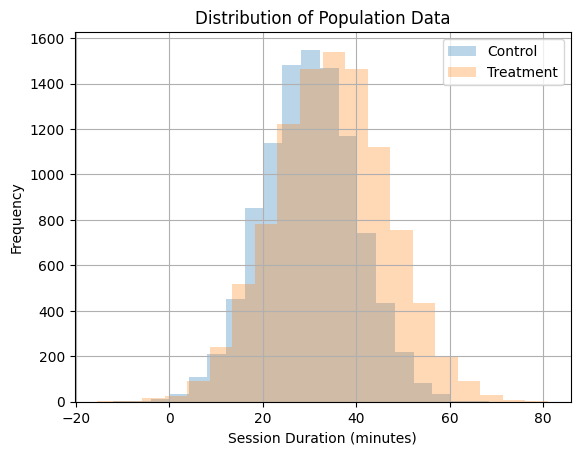

Average Session Duration for Control Population: 29.99 minutes
Average Session Duration for Treatment Population: 34.74 minutes


In [14]:
# Simulate population data for control and treatment groups using normal distribution
population_size = 10000

# Duration is based on minuetes
population_control = pd.DataFrame()
population_control['Session Duration']  = np.random.normal(loc=30, scale=10, size=population_size)  
population_treatment = pd.DataFrame()
population_treatment['Session Duration'] = np.random.normal(loc=35, scale=12, size=population_size)  


# Plot the distribution of population data
population_control['Session Duration'].hist(bins=20, alpha=0.3, label='Control')
population_treatment['Session Duration'].hist(bins=20, alpha=0.3,label='Treatment' )
plt.xlabel('Session Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Population Data')
plt.legend()
plt.show()

# Calculate the average session duration for each population
average_duration_control_population = np.mean(population_control)
average_duration_treatment_population = np.mean(population_treatment)
print(f"Average Session Duration for Control Population: {average_duration_control_population:.2f} minutes")
print(f"Average Session Duration for Treatment Population: {average_duration_treatment_population:.2f} minutes")


## Sampling
The company decides to test the feature on 1000 users, they send half of them to the new experience (treatment) and half to the old one (control). They compare the average session duration for each group.

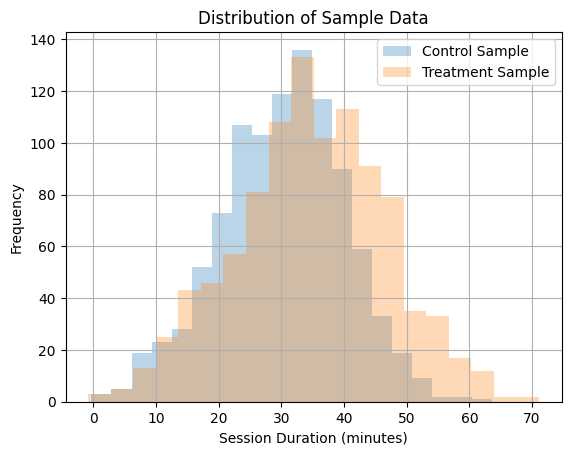

Average Session Duration for Control Sample: 30.11 minutes
Average Session Duration for Treatment Sample: 34.79 minutes


In [20]:
# Sample size
sample_size = 1000

# Sample from the control and treatment populations
sample_control = pd.DataFrame()
sample_control['Session Duration'] = np.random.choice(population_control['Session Duration'], size=sample_size, replace=False)
sample_treatment = pd.DataFrame()
sample_treatment['Session Duration'] = np.random.choice(population_treatment['Session Duration'], size=sample_size, replace=False)


sample_control['Session Duration'].hist(bins=20, alpha=0.3,label='Control Sample')
sample_treatment['Session Duration'].hist(bins=20, alpha=0.3,label='Treatment Sample' )
plt.xlabel('Session Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Data')
plt.legend()
plt.show()

# Calculate the average session duration for each sample
average_duration_control_sample = np.mean(sample_control)
average_duration_treatment_sample = np.mean(sample_treatment)
print(f"Average Session Duration for Control Sample: {average_duration_control_sample:.2f} minutes")
print(f"Average Session Duration for Treatment Sample: {average_duration_treatment_sample:.2f} minutes")


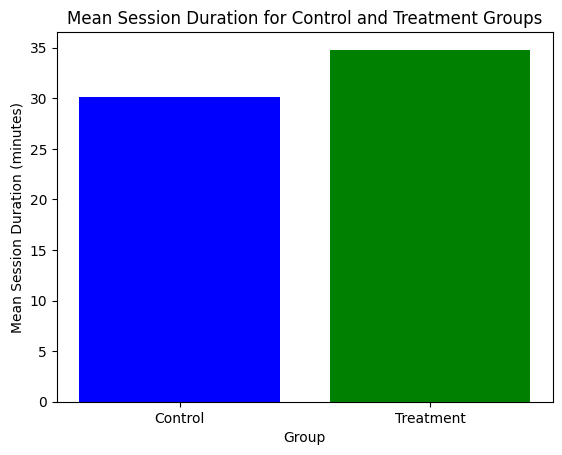

In [36]:
# Calculate the mean session duration for the control and treatment groups
mean_session_duration_control = sample_control['Session Duration'].mean()
mean_session_duration_treatment = sample_treatment['Session Duration'].mean()

# Plot the mean session duration for each group
plt.bar(['Control', 'Treatment'], [mean_session_duration_control, mean_session_duration_treatment], color=['blue', 'green'])
plt.xlabel('Group')
plt.ylabel('Mean Session Duration (minutes)')
plt.title('Mean Session Duration for Control and Treatment Groups')
plt.show()


### Test Result

In [32]:
from scipy.stats import ttest_ind

# Perform t-test
t_statistic, p_value = ttest_ind(sample_control['Session Duration'], sample_treatment['Session Duration'], equal_var=False)

# Print the results
print(f"T-Statistic: {t_statistic:.3f}")
print(f"P-Value: {p_value:.3f}")
# Check for statistical significance
alpha = 0.05
if p_value < alpha:
    print("The difference in session duration between control and treatment groups is statistically significant.")
else:
    print("There is no statistically significant difference in session duration between control and treatment groups.")


T-Statistic: -9.464
P-Value: 0.000
The difference in session duration between control and treatment groups is statistically significant.


### For evaluating treatment group's duration is greater than control group
##### (H0): The average session duration for the treatment group is less than or equal to the average session duration for the control group.
##### (H1): The average session duration for the treatment group is greater than the average session duration for the control group.

In [34]:
# Perform one-tailed t-test
t_statistic, p_value = stats.ttest_ind(sample_control['Session Duration'], sample_treatment['Session Duration'], equal_var=False)
, alternative='greater')

# Print the results
print(f"T-Statistic: {t_statistic:.2f}")
print(f"P-Value: {p_value:.4f}")

# Define significance level
alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis (H0). The average session duration for the treatment group is greater than the control group.")
else:
    print("Fail to reject the null hypothesis (H0). There is no sufficient evidence to conclude that the average session duration for the treatment group is greater than the control group.")


T-Statistic: -9.46
P-Value: 0.0000
Reject the null hypothesis (H0). The average session duration for the treatment group is greater than the control group.
